Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [33]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore')
boston = load_boston()
scaler = StandardScaler()
x = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['price'])
plt.style.use('fivethirtyeight')

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test), columns = x_test.columns)

In [31]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_scaled)
x_test_tsne = tsne.fit_transform(x_test_scaled)

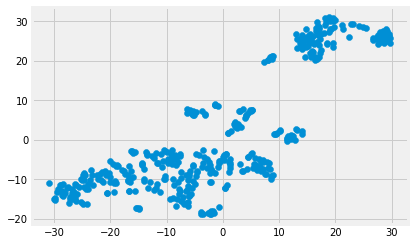

In [35]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])

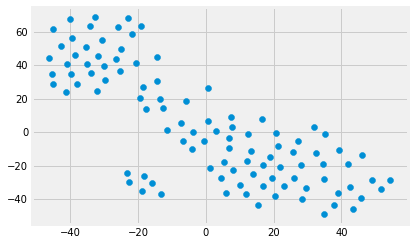

In [36]:
plt.scatter(x_test_tsne[:, 0], x_test_tsne[:, 1])

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42. Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами. Вычислите средние значения price и CRIM в разных кластерах.

In [38]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [74]:
train_labels = model.fit_predict(x_train_scaled)

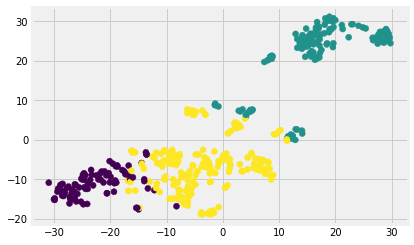

In [43]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=train_labels)

In [56]:
x_train.loc[train_labels==0, 'CRIM'].mean()

0.07356558139534884

In [57]:
x_train.loc[train_labels==1, 'CRIM'].mean()

10.797028425196851

In [58]:
x_train.loc[train_labels==2, 'CRIM'].mean()

0.4216602094240837

In [61]:
y_train.loc[train_labels==0, 'price'].mean()

27.78837209302326

In [62]:
y_train.loc[train_labels==1, 'price'].mean()

16.165354330708663

In [63]:
y_train.loc[train_labels==2, 'price'].mean()

24.958115183246072

*Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [75]:
test_labels = model.predict(x_test_scaled)

In [76]:
x_test.loc[test_labels==0, 'CRIM'].mean()

0.07985181818181818

In [77]:
x_test.loc[test_labels==1, 'CRIM'].mean()

10.165531142857143

In [78]:
x_test.loc[test_labels==2, 'CRIM'].mean()

0.2845831111111111

In [79]:
y_test.loc[test_labels==0, 'price'].mean()

28.413636363636364

In [80]:
y_test.loc[test_labels==1, 'price'].mean()

16.43714285714286

In [81]:
y_test.loc[test_labels==2, 'price'].mean()

22.031111111111112